In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [21]:
df = df[df.columns[[0, -1]]]
df

,ph,Potability
0,NaN,0
1,3.716080,0
2,8.099124,0
3,8.316766,0
4,9.092223,0
...,...,...
3271,4.668102,1
3272,7.808856,1
3273,9.419510,1
3274,5.126763,1


In [22]:
df.dropna(inplace=True)
df

C:\Users\timurdavletkulov\AppData\Local\Temp\ipykernel_8856\955798070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,ph,Potability
1,3.716080,0
2,8.099124,0
3,8.316766,0
4,9.092223,0
5,5.584087,0
...,...,...
3271,4.668102,1
3272,7.808856,1
3273,9.419510,1
3274,5.126763,1


In [23]:
def set_value(x):
    if x < 5:
        return 0
    
    if x > 7.5:
        return 2
    
    return 1

df['Potability'] = df['ph'].apply(set_value)
df

C:\Users\timurdavletkulov\AppData\Local\Temp\ipykernel_8856\3545399850.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Potability'] = df['ph'].apply(set_value)


,ph,Potability
1,3.716080,0
2,8.099124,2
3,8.316766,2
4,9.092223,2
5,5.584087,1
...,...,...
3271,4.668102,0
3272,7.808856,2
3273,9.419510,2
3274,5.126763,1


In [24]:
df = df.rename(columns={'Potability': 'danger_type'})
df

,ph,danger_type
1,3.716080,0
2,8.099124,2
3,8.316766,2
4,9.092223,2
5,5.584087,1
...,...,...
3271,4.668102,0
3272,7.808856,2
3273,9.419510,2
3274,5.126763,1


In [25]:
from sklearn.model_selection import train_test_split 

X = df.iloc[:, [0]]
Y = df.iloc[:, [1]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

c:\Users\timurdavletkulov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred) * 100, '%')

99.64114832535886 %


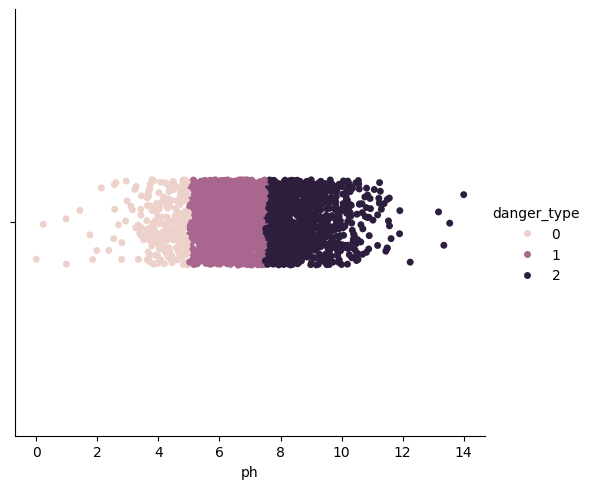

In [39]:
import seaborn as sns
sns.catplot(x='ph', hue='danger_type', data=df)

In [ ]:
import pickle


filename = 'model.sav'
pickle.dump(classifier, open(filename, 'wb'))